In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [2]:
#download flower datasets
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir =tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)
data_dir =pathlib.Path(data_dir)

228813984/228813984 [==============================] - 28s 0us/step


In [3]:
# berapa jumlah gambar yang ditarik
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


sebuah data sets terdiri dari 3670 images bunga yang di bagi kedalam sebuah 5 sub direktori : dandelion,roses,tulips,daisy, dan sunflowers

In [4]:
print(os.listdir(data_dir))

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']


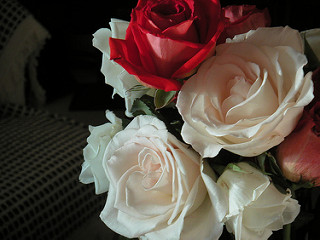

In [15]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(roses[1])

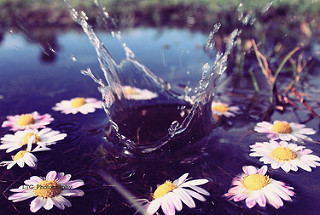

In [17]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(daisy[2])

ukuran dari setiap gambar sangat berbeda maka dari itu diperlukan untuk melakukan pross resize

Perbandingan sebuah training agar setiap train melakukan validasi dengan 80:20 dari 3670 data

In [19]:
batch_size = 32
img_height = 180
img_width =180
# train image
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed=123,
    image_size= (img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [20]:
# validation image
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Train :
3670 x 80% = 2936

Validation :
3670 x 20% = 734

In [22]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


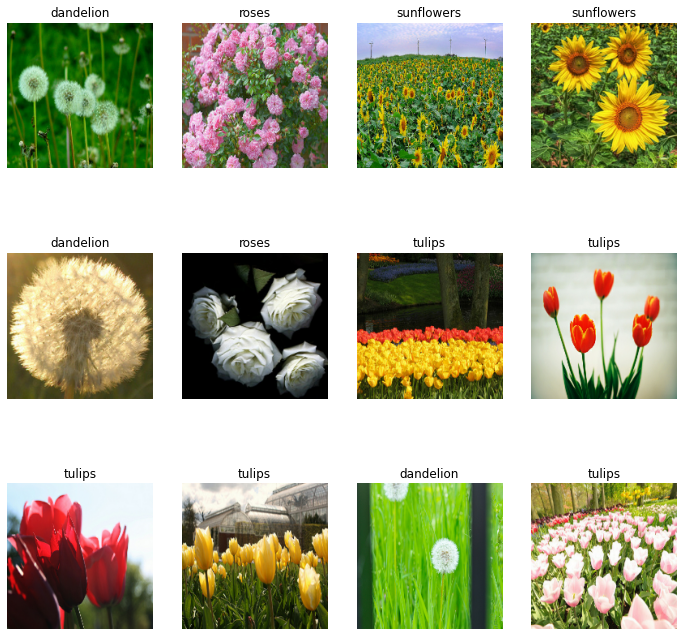

In [25]:
# sample images
plt.figure(figsize=(12,12))
for images, labels in train_ds.take(1): #akan diambil satu setuap subclass
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [27]:
num_classes= len(class_names)
num_classes

5

In [34]:
model  = Sequential([
    #input layers untuk rescaling gambar 255 byte
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    #layers conversi sebuah bentuk menjadi 2d
    # setiap layers jumlah progetron exponenial dengan jumlah TLU 3 
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    
    # preprocesing data to 1D, default 28x28
    layers.Flatten(),
    # make hidden layers to computation sebuah classifier per predict proba setiap instance terhadap satu label num_class=>5
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')#multiclass
])

In [35]:
# compile the model
#backward  -> loss menggunakan sebuah crossentorpy dengan optimasi 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)        1

In [37]:
# train
epochs=15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/15


d:\Materi_data-science\Code\Classifier Flower\env\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 25s 272ms/step - loss: 1.5156 - accuracy: 0.3515 - val_loss: 1.2558 - val_accuracy: 0.4891
Epoch 2/15
92/92 [==============================] - 24s 256ms/step - loss: 1.0770 - accuracy: 0.5743 - val_loss: 1.0134 - val_accuracy: 0.5708
Epoch 3/15
92/92 [==============================] - 24s 258ms/step - loss: 0.8911 - accuracy: 0.6587 - val_loss: 0.9117 - val_accuracy: 0.6458
Epoch 4/15
92/92 [==============================] - 24s 257ms/step - loss: 0.6684 - accuracy: 0.7439 - val_loss: 1.0937 - val_accuracy: 0.5654
Epoch 5/15
92/92 [==============================] - 24s 258ms/step - loss: 0.4547 - accuracy: 0.8328 - val_loss: 1.1523 - val_accuracy: 0.5981
Epoch 6/15
92/92 [==============================] - 24s 259ms/step - loss: 0.2556 - accuracy: 0.9152 - val_loss: 1.2841 - val_accuracy: 0.6417
Epoch 7/15
92/92 [==============================] - 24s 258ms/step - loss: 0.1657 - accuracy: 0.9462 - val_loss: 1.4692 - val_accuracy: 0.6362
Epoch 8/15

In [43]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.515572,0.351499,1.255769,0.489101
1,1.076989,0.574251,1.013370,0.570845
2,0.891123,0.658719,0.911702,0.645777
3,0.668446,0.743869,1.093731,0.565395
4,0.454654,0.832766,1.152327,0.598093
5,0.255553,0.915191,1.284109,0.641689
6,0.165736,0.946185,1.469167,0.636240
7,0.094864,0.971390,1.624180,0.622616
8,0.042382,0.989101,2.271909,0.617166
9,0.048209,0.986717,1.922156,0.613079


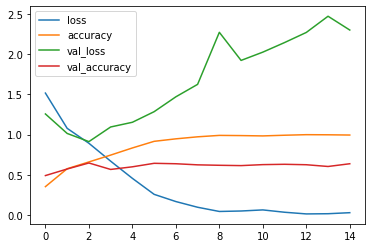

In [45]:
plt.plot(pd.DataFrame(history.history))
plt.grid(False)
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.show() 

model mengalami overfitting

In [46]:
def predict_input_image(img):
    img_4d = img.reshape(-1,180,180,3)
    predic=model.predict(img_4d)[0]
    return {class_names[i]:float(predic[i]) for i in range(5)}

In [53]:
import pickle
# pickle.dump(train_ds,open('train_data.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://1380a52b-58de-4ae6-bc96-d139366f7df1/assets


INFO:tensorflow:Assets written to: ram://1380a52b-58de-4ae6-bc96-d139366f7df1/assets


In [59]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [50]:
import gradio as gr
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

d:\Materi_data-science\Code\Classifier Flower\env\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
d:\Materi_data-science\Code\Classifier Flower\env\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [51]:
gr.Interface(fn=predict_input_image,inputs=image,outputs=label,interpretation='default').launch(debug=True)

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 17ms/step
Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x219a108cf10>, 'http://127.0.0.1:7860/', None)